In [34]:
import os
import pathlib

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [37]:
df=pd.read_csv("C:/Users/DS3/Downloads/student_performance_new.csv")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sl.No.              54 non-null     int64  
 1   USN                 54 non-null     object 
 2   STUDENT NAME        54 non-null     object 
 3   Test I              54 non-null     int64  
 4   Test II             54 non-null     int64  
 5   Test III            54 non-null     int64  
 6   Test Total          54 non-null     float64
 7   Test Result         54 non-null     int64  
 8   Quiz 1              54 non-null     float64
 9   Quiz 2              54 non-null     float64
 10  Compensatory        53 non-null     float64
 11  Quiz                54 non-null     float64
 12  Quiz Result         54 non-null     int64  
 13  Test + Quiz         54 non-null     float64
 14  Assignment          54 non-null     int64  
 15  Unnamed: 15         54 non-null     int64  
 16  Assignment

In [39]:
df.describe()

,Sl.No.,Test I,Test II,Test III,Test Total,Test Result,Quiz 1,Quiz 2,Compensatory,Quiz,Quiz Result,Test + Quiz,Assignment,Unnamed: 15,Assignment Result,Result
count,54.000000,54.000000,54.000000,54.00000,54.000000,54.000000,54.000000,54.000000,53.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.0,54.000000
mean,27.907407,23.740741,30.462963,18.87037,24.358025,0.462963,5.592593,5.148148,9.490566,15.481481,0.981481,39.839506,13.759259,13.666667,1.0,0.500000
std,16.156392,8.355735,9.158382,7.47334,6.489744,0.503308,1.363521,1.516045,1.011903,1.710023,0.136083,6.903495,0.698656,0.700404,0.0,0.504695
min,1.000000,6.000000,6.000000,5.00000,12.666667,0.000000,2.500000,2.000000,7.000000,10.500000,0.000000,27.000000,13.000000,12.000000,1.0,0.000000
25%,14.250000,17.000000,25.500000,14.25000,18.916667,0.000000,5.000000,4.000000,10.000000,15.000000,1.000000,35.041667,13.000000,13.000000,1.0,0.000000
50%,27.500000,25.000000,32.000000,18.00000,24.000000,0.000000,5.500000,5.000000,10.000000,15.500000,1.000000,38.500000,14.000000,14.000000,1.0,0.500000
75%,41.750000,29.750000,37.750000,22.00000,28.500000,1.000000,6.875000,6.000000,10.000000,16.500000,1.000000,45.375000,14.000000,14.000000,1.0,1.000000
max,55.000000,46.000000,45.000000,43.00000,41.000000,1.000000,8.000000,10.000000,10.000000,20.000000,1.000000,60.000000,15.000000,15.000000,1.0,1.000000


In [40]:
df.isnull().sum()

Sl.No.                0
USN                   0
STUDENT NAME          0
Test I                0
Test II               0
Test III              0
Test Total            0
Test Result           0
Quiz 1                0
Quiz 2                0
Compensatory          1
Quiz                  0
Quiz Result           0
Test + Quiz           0
Assignment            0
Unnamed: 15           0
Assignment Result     0
Result                0
dtype: int64

In [41]:
df.dropna(inplace=True)

In [42]:
X=df.columns[3:17]
X

Index(['Test I ', 'Test II ', 'Test III', 'Test Total ', 'Test Result ',
       'Quiz 1', 'Quiz 2', 'Compensatory', 'Quiz', 'Quiz Result ',
       'Test + Quiz', 'Assignment ', 'Unnamed: 15', 'Assignment Result '],
      dtype='object')

In [43]:
encoded_df=pd.get_dummies(df[X],drop_first=True)
list(encoded_df.columns)

['Test I ',
 'Test II ',
 'Test III',
 'Test Total ',
 'Test Result ',
 'Quiz 1',
 'Quiz 2',
 'Compensatory',
 'Quiz',
 'Quiz Result ',
 'Test + Quiz',
 'Assignment ',
 'Unnamed: 15',
 'Assignment Result ']

In [44]:
import statsmodels.api as sm
y=df.Result
x=sm.add_constant(encoded_df)

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [119]:
clf=DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=20) #change max_depth val to 2 or 3
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=20)

In [120]:
from sklearn import tree
classnames=['Retain','Not-Retain']
fig=plt.figure(figsize=(50,40))

<Figure size 5000x4000 with 0 Axes>

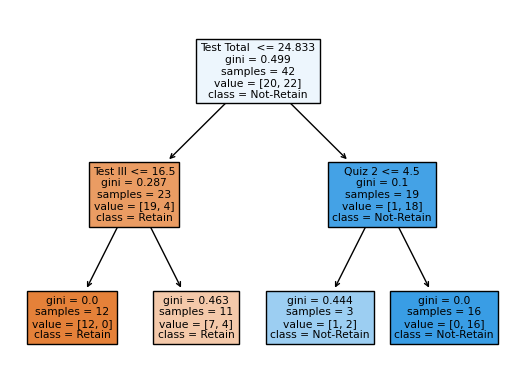

In [121]:
tree.plot_tree(clf,feature_names=x_train.columns.tolist(),class_names=classnames,filled=True);

In [122]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
train_tree_predict=clf.predict(x_train)

In [123]:
confusionmatrix=confusion_matrix(y_train,train_tree_predict)

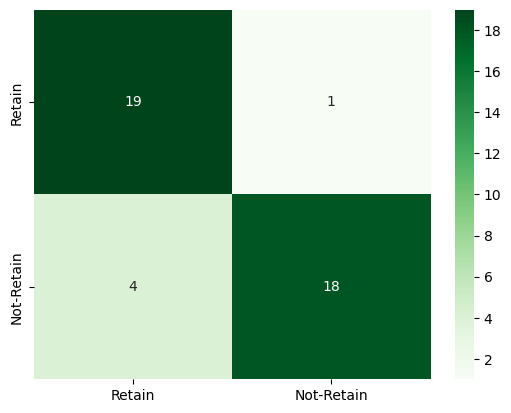

In [124]:
#classnames=['Retain','Not-Retain']
#confusionmatrix=confusion_matrix(y_train,train_tree_predict)
sns.heatmap(confusionmatrix,annot=True,yticklabels=classnames,xticklabels=classnames,fmt="g",cmap="Greens");
#confusionmatrix=confusion_matrix(y_train,train_tree_predict)
#sn.heatmap(confusionmatrix,annot=True,yticklabels=classnames,xticklabels=classnames,fmt="g",cmap="Greens")

In [125]:
metrics.roc_auc_score(y_train,train_tree_predict)

0.8840909090909091

In [126]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
test_tree_predict=clf.predict(x_test)

[Text(0.5, 0.8333333333333334, 'Test Total  <= 24.833\ngini = 0.499\nsamples = 42\nvalue = [20, 22]\nclass = Fail'),
 Text(0.25, 0.5, 'Test III <= 16.5\ngini = 0.287\nsamples = 23\nvalue = [19, 4]\nclass = Pass'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]\nclass = Pass'),
 Text(0.375, 0.16666666666666666, 'gini = 0.463\nsamples = 11\nvalue = [7, 4]\nclass = Pass'),
 Text(0.75, 0.5, 'Quiz 2 <= 4.5\ngini = 0.1\nsamples = 19\nvalue = [1, 18]\nclass = Fail'),
 Text(0.625, 0.16666666666666666, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Fail'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]\nclass = Fail')]

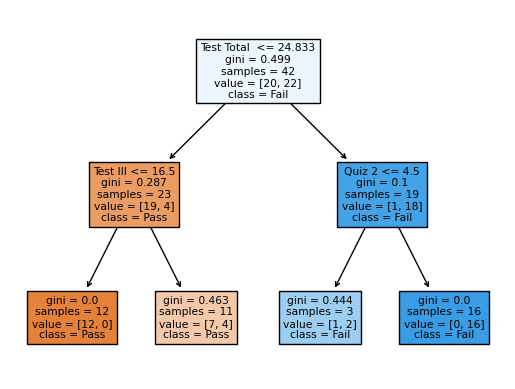

In [127]:
classnames=['Pass','Fail']
dlf=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=20)
dlf.fit(x_test,y_test)
tree.plot_tree(clf,feature_names=x_test.columns.tolist(),class_names=classnames,filled=True)

In [128]:
#classnames=['Pass','Fail']
confusionmatrix=confusion_matrix(y_test,test_tree_predict)
#sns.heatmap(confusionmatrix,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='g',cmap="Green");

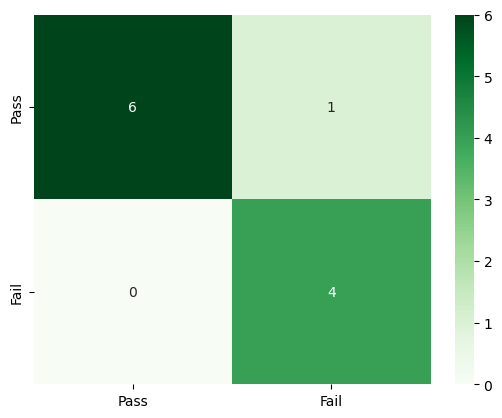

In [129]:
sns.heatmap(confusionmatrix,annot=True,yticklabels=classnames,xticklabels=classnames,fmt="g",cmap="Greens");

In [131]:
metrics.roc_auc_score(y_test,test_tree_predict)

0.9285714285714286

In [132]:
print(confusionmatrix)

[[6 1]
 [0 4]]


In [133]:
x_test

,Test I,Test II,Test III,Test Total,Test Result,Quiz 1,Quiz 2,Compensatory,Quiz,Quiz Result,Test + Quiz,Assignment,Unnamed: 15,Assignment Result
20,18,6,14,12.666667,0,7.0,10.0,10.0,20.0,1,32.666667,13,14,1
42,34,39,34,35.666667,1,5.5,5.0,7.0,10.5,1,46.166667,14,14,1
48,16,23,12,17.000000,0,2.5,3.5,10.0,13.5,1,30.500000,14,13,1
13,25,42,17,28.000000,1,7.5,5.0,10.0,17.5,1,45.500000,14,14,1
44,19,32,5,18.666667,0,6.5,4.0,10.0,16.5,1,35.166667,13,13,1
6,32,45,28,35.000000,1,7.5,8.0,7.0,15.0,1,50.000000,15,15,1
18,17,23,15,18.333333,0,3.5,5.0,10.0,15.0,1,33.333333,13,14,1
51,25,27,15,22.333333,0,5.5,4.5,10.0,15.5,1,37.833333,13,14,1
4,25,42,27,31.333333,1,6.0,5.0,10.0,16.0,1,47.333333,13,14,1
33,30,38,18,28.666667,1,7.0,3.0,10.0,17.0,1,45.666667,14,13,1


In [134]:
y_test

20    0
42    1
48    0
13    1
44    0
6     0
18    0
51    0
4     1
33    1
14    0
Name: Result, dtype: int64

In [157]:
result=clf.predict([[13,29,23,21.666667,0,5.5,8.0,7.0,15.0,1,36.666667,13,13,1]])
#rs=result.reshape(-1,1)
print("Result :",result[0])
if result==1:
    print("Pass")
else:
    print("Fail")

Result : 0
Fail


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [153]:
y = clf.predict([[27, 33, 22, 27.3, 12.666667, 0, 7, 10, 20, 0, 32.66667, 13, 14, 1]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [154]:
print("Result:",y[0])
if y==1:
    print("Pass")
else:
    print("Fail")

Result: 1
Pass
